In [57]:
# SARIMAX AVEC AUTO ARIMA PARAMS

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [418]:
uber = pd.read_csv('../uber_data.csv', parse_dates= True)

In [419]:
uber.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [420]:
uber = uber.dropna()

In [421]:
manhattan = uber[uber['borough'] == 'Queens']
manhattan

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
11,2015-01-01 02:00:00,Queens,331,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
18,2015-01-01 03:00:00,Queens,440,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y
25,2015-01-01 04:00:00,Queens,344,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y
32,2015-01-01 05:00:00,Queens,241,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29072,2015-06-30 19:00:00,Queens,417,5.0,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N
29079,2015-06-30 20:00:00,Queens,438,8.0,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N
29086,2015-06-30 21:00:00,Queens,483,7.0,10.0,76.0,61.0,1012.4,0.0,0.0,0.0,0.0,N
29092,2015-06-30 22:00:00,Queens,556,5.0,10.0,76.0,64.0,1011.9,0.0,0.0,0.0,0.0,N


In [422]:
manhattan = manhattan.set_index('pickup_dt', drop=True)

In [423]:
#manhattan = manhattan.drop('hday', axis=1)

In [424]:
manhattan = manhattan.drop('borough', axis=1)

In [425]:
manhattan = pd.get_dummies(manhattan)

In [426]:
manhattan

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday_N,hday_Y
pickup_dt,,,,,,,,,,,,
2015-01-01 01:00:00,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,0,1
2015-01-01 02:00:00,331,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,0,1
2015-01-01 03:00:00,440,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,0,1
2015-01-01 04:00:00,344,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,0,1
2015-01-01 05:00:00,241,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30 19:00:00,417,5.0,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,1,0
2015-06-30 20:00:00,438,8.0,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,1,0
2015-06-30 21:00:00,483,7.0,10.0,76.0,61.0,1012.4,0.0,0.0,0.0,0.0,1,0


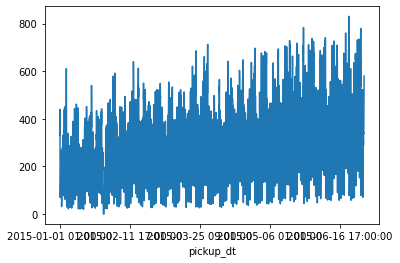

In [427]:
manhattan['pickups'].plot()

In [428]:
#donne le prix du jour d'apres car cela va etre le prix à prédire 
steps = -1
manhattan['actual'] = manhattan['pickups'].shift(steps)
manhattan.tail(3)

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday_N,hday_Y,actual
pickup_dt,,,,,,,,,,,,,
2015-06-30 21:00:00,483,7.0,10.0,76.0,61.0,1012.4,0.0,0.0,0.0,0.0,1,0,556.0
2015-06-30 22:00:00,556,5.0,10.0,76.0,64.0,1011.9,0.0,0.0,0.0,0.0,1,0,580.0
2015-06-30 23:00:00,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,1,0,NaN


In [429]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0,1))
scaled_input = sc_in.fit_transform(manhattan[['pickups','temp','pcp01','hday_N']])
scaled_input= pd.DataFrame(scaled_input)
X = scaled_input
#X.rename(columns={0:'pickups',1:'temp'}, inplace = True)
X.columns = ['pickups','temp','pcp01','hday_N']
X

,pickups,temp,pcp01,hday_N
0,0.487365,0.321839,0.0,0.0
1,0.398315,0.321839,0.0,0.0
2,0.529483,0.321839,0.0,0.0
3,0.413959,0.310345,0.0,0.0
4,0.290012,0.298851,0.0,0.0
...,...,...,...,...
4338,0.501805,0.896552,0.0,1.0
4339,0.527076,0.896552,0.0,1.0
4340,0.581227,0.850575,0.0,1.0
4341,0.669073,0.850575,0.0,1.0


In [430]:
sc_out = MinMaxScaler(feature_range=(0,1))
scaler_output = sc_out.fit_transform(manhattan[['actual']])
scaler_output = pd.DataFrame(scaler_output)
y = scaler_output
y.rename(columns={0:'pickups_hour_after'}, inplace = True)
y

,pickups_hour_after
0,0.398315
1,0.529483
2,0.413959
3,0.290012
4,0.178099
...,...
4338,0.527076
4339,0.581227
4340,0.669073
4341,0.697954


In [431]:
#train_size = int(len(manhattan)*0.7)
#test_size = int(len(manhattan)) - train_size

train_size = int(len(manhattan)-720)
test_size = int(len(manhattan)) - train_size

X_train, y_train = X[:train_size].dropna(), y[:train_size].dropna()
X_test, y_test = X[train_size:].dropna(), y[train_size:].dropna()

In [432]:
y_test

,pickups_hour_after
3623,0.814681
3624,0.720818
3625,0.267148
3626,0.145608
3627,0.214200
...,...
4337,0.501805
4338,0.527076
4339,0.581227
4340,0.669073


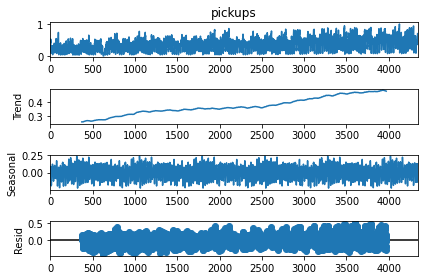

In [433]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose(X['pickups'], model= 'add', period=742)

fig = sd.plot()
fig.set_figheight(4)
plt.show()

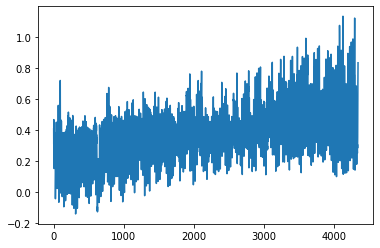

In [434]:
x =  sd.observed - sd.seasonal
x.plot()

In [435]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'Valeur critique ({key})']=val
    if dftest[1]<=0.05:
        print("Preuves contre la null hypothesis")
        print("On rejette la null hypothesis - les données sont stationaire")
    else:
        print("Preuves pour la null hypothesis")
        print("On accept la null hypothesis - les données ne sont pas stationaire")

In [436]:
test = y['pickups_hour_after'][:train_size].dropna()
test_adf(test,'pickups')

Preuves contre la null hypothesis
On rejette la null hypothesis - les données sont stationaire


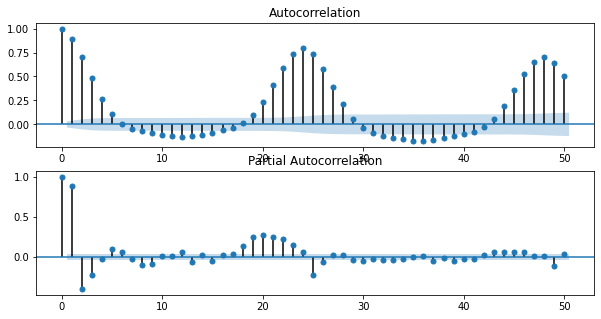

In [437]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(test, lags=50, ax=ax[1])
plt.show()

In [129]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train, 
 exogenous= X_train,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12969.468, Time=4.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12919.495, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12968.021, Time=3.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12953.791, Time=2.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12921.480, Time=1.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-12975.952, Time=4.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-12973.262, Time=4.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13076.843, Time=6.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-13096.613, Time=5.81 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-13194.687, Time=7.85 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-13346.318, Time=9.20 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-13433.015, Time=11.34 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-13464.700, Time=12.86 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-13470.091, Time=13.41 sec
 A

In [438]:
X_train

,pickups,temp,pcp01,hday_N
0,0.487365,0.321839,0.000000,0.0
1,0.398315,0.321839,0.000000,0.0
2,0.529483,0.321839,0.000000,0.0
3,0.413959,0.310345,0.000000,0.0
4,0.290012,0.298851,0.000000,0.0
...,...,...,...,...
3618,0.740072,0.842912,0.107143,1.0
3619,0.734055,0.833333,0.053571,1.0
3620,0.873646,0.789272,1.000000,1.0
3621,0.814681,0.773946,0.904762,1.0


In [439]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3623
Model:               SARIMAX(7, 1, 6)   Log Likelihood                6859.978
Date:                Tue, 20 Oct 2020   AIC                         -13683.957
Time:                        11:50:18   BIC                         -13572.451
Sample:                             0   HQIC                        -13644.231
                               - 3623                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pickups        0.1663      0.036      4.603      0.000       0.095       0.237
temp           0.0278      0.032      0.881      0.378      -0.034       0.090
pcp01          0.0115      0.009      1.223      0.221      -0.007       0.030
hday_N        -0.0040      0.008     -0.513      0.608      -0.019       0.011
ar.L1          0.6888      0.563      1.223      0.221      -0.415       1.793
ar.L2          0.3433      0.699      0.491      0.624      -1.027       1.714
ar.L3         -0.6720      0.293     -2.294      0.022      -1.246      -0.098
ar.L4         -0.1185      0.356     -0.333      0.739      -0.815       0.578
ar.L5          0.3253      0.199      1.635      0.102      -0.065       0.715
ar.L6          0.0828      0.341      0.243      0.808      -0.586       0.751
ar.L7         -0.1938      0.195     -0.993      0.321      -0.576       0.189
ma.L1         -0.3562      0.555     -0.641      0.521      -1.445       0.732
ma.L2         -0.4423      0.514     -0.861      0.389      -1.450       0.565
ma.L3          0.3988      0.200      1.998      0.046       0.008       0.790
ma.L4          0.2061      0.264      0.780      0.435      -0.312       0.724
ma.L5         -0.3260      0.182     -1.793      0.073      -0.683       0.030
ma.L6         -0.4098      0.342     -1.199      0.230      -1.079       0.260
sigma2         0.0013   1.96e-05     67.378      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      618.77   Jarque-Bera (JB):              3066.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [440]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model= SARIMAX(y_train, 
 exog=X_train,
 order=(1,1,2),
 enforce_invertibility=False, enforce_stationarity=False)

In [441]:
X_train

,pickups,temp,pcp01,hday_N
0,0.487365,0.321839,0.000000,0.0
1,0.398315,0.321839,0.000000,0.0
2,0.529483,0.321839,0.000000,0.0
3,0.413959,0.310345,0.000000,0.0
4,0.290012,0.298851,0.000000,0.0
...,...,...,...,...
3618,0.740072,0.842912,0.107143,1.0
3619,0.734055,0.833333,0.053571,1.0
3620,0.873646,0.789272,1.000000,1.0
3621,0.814681,0.773946,0.904762,1.0


In [442]:
#le nombre d'iteration est de 50 par default ce qui empeche le maximum likehood optimization de converger
#pour résoudre le problème de converger on augment le parametre maxiter de la methode fit
#ca diminue legerement notre erreur :  de 27.15 -> 27.14
results = model.fit(maxiter = 100)

In [443]:
results.mle_retvals

{'fopt': -1.2017148798793253,
 'gopt': array([-5.90554272e-06, -1.16406884e-06, -1.13130483e-04,  5.92279559e-06,
         1.22521993e-05,  1.46973345e-04,  1.38264844e-04, -5.33184386e-05]),
 'fcalls': 810,
 'warnflag': 0,
 'converged': True,
 'iterations': 49}

In [444]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps),exog=X_test)

In [445]:
predictions

3623    0.613101
3624    0.689776
3625    0.622172
3626    0.341689
3627    0.253782
          ...   
4338    0.496449
4339    0.511948
4340    0.540454
4341    0.594330
4342    0.610866
Length: 720, dtype: float64

In [446]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [447]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=X_test.index
predictions['actual'] = act['pickups_hour_after']
predictions.rename(columns={0:'Pred'}, inplace=True)
predictions

,Pred,actual
3623,0.613101,0.814681
3624,0.689776,0.720818
3625,0.622172,0.267148
3626,0.341689,0.145608
3627,0.253782,0.214200
...,...,...
4338,0.496449,0.527076
4339,0.511948,0.581227
4340,0.540454,0.669073
4341,0.594330,0.697954


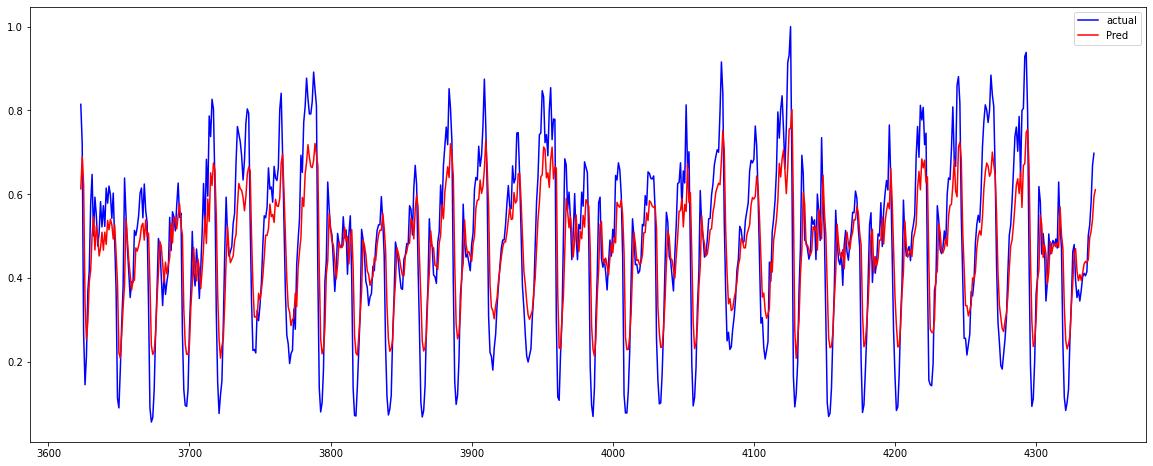

In [448]:
predictions['actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

In [449]:
test_size

720

In [450]:
forecast= results.forecast(steps=test_size, exog=X_test)

In [451]:
forecast

3623    0.613101
3624    0.689776
3625    0.622172
3626    0.341689
3627    0.253782
          ...   
4338    0.496449
4339    0.511948
4340    0.540454
4341    0.594330
4342    0.610866
Length: 720, dtype: float64

In [452]:
y_test

,pickups_hour_after
3623,0.814681
3624,0.720818
3625,0.267148
3626,0.145608
3627,0.214200
...,...
4337,0.501805
4338,0.527076
4339,0.581227
4340,0.669073


In [453]:
#X_test.to_csv('../X_test_sarimax.csv', index=False)

In [454]:
#y_test.to_csv('../y_test_sarimax.csv', index=False)

In [455]:
forecast= pd.DataFrame(forecast)
forecast.reset_index(drop=True, inplace=True)
forecast.index=X_test.index
forecast['actual'] =scaler_output.iloc[train_size:, 0]
forecast.rename(columns={0:'Forecast'}, inplace=True)

In [456]:
#forecast['Forecast'].to_csv('pred_sarimax_bronx.csv')

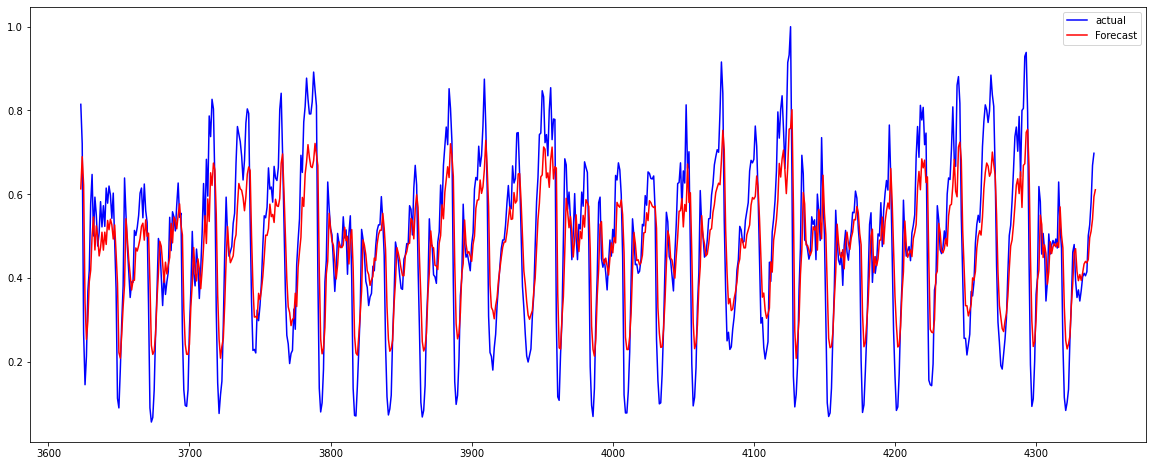

In [457]:
forecast['actual'].plot(figsize=(20,8), legend=True, color='blue')
forecast['Forecast'].plot(legend=True, color='red', figsize=(20,8))

In [458]:
trainPredict = sc_out.inverse_transform(predictions[['Pred']])
testPredict = sc_out.inverse_transform(predictions[['actual']])

In [459]:
t_p = pd.DataFrame(trainPredict)
t_p

t_p.to_csv('pred_sarimax_queens.csv')

In [460]:
def smape_perso(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [461]:
#rajouter la temp et les precipitations à 1h permet de passer de 27.14 -> 26.84

evaluating = smape_perso(trainPredict[:-1], testPredict[:-1])
evaluating

22.771407882726724

In [ ]:
import pickle

#pickle.dump(results, open('model_sarimax_brooklyn.pkl','wb'))

In [103]:
y_test = sc_out.inverse_transform(y_test[['pickups_hour_after']])
y_test

array([[ 704.],
       [ 488.],
       [ 349.],
       [ 453.],
       [ 803.],
       [1112.],
       [1988.],
       [3121.],
       [3763.],
       [3195.],
       [3704.],
       [3729.],
       [3099.],
       [2640.],
       [2881.],
       [3238.],
       [3821.],
       [4553.],
       [5492.],
       [5065.],
       [4730.],
       [4508.],
       [3737.],
       [2031.],
       [1119.],
       [ 649.],
       [ 355.],
       [ 342.],
       [ 584.],
       [ 933.],
       [1954.],
       [3325.],
       [4049.],
       [3293.],
       [2501.],
       [2573.],
       [2428.],
       [2683.],
       [3642.],
       [4073.],
       [4567.],
       [5368.],
       [6413.],
       [5721.],
       [5546.],
       [5324.],
       [4232.],
       [2345.],
       [1284.],
       [ 723.],
       [ 431.],
       [ 362.],
       [ 589.],
       [ 904.],
       [1847.],
       [2839.],
       [3218.],
       [2676.],
       [2210.],
       [2199.],
       [2112.],
       [2413.],
       [

In [104]:
y_test = pd.DataFrame(y_test,columns=['actual'])
y_test

y_test.to_csv('../y_test_sarimax.csv', index=False)

In [105]:
y_test

,actual
0,704.0
1,488.0
2,349.0
3,453.0
4,803.0
...,...
714,4585.0
715,4210.0
716,4313.0
717,4452.0


In [ ]:
trainPredict